# Loading Libraries , packages and modules for project

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#For Regression Problem
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

#for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


# Loading Data file (Avacodo data)

In [223]:
#The  Date column must be Parsed to convert the column in to datetime format, year column doesnot needed


In [224]:
df=pd.read_csv('avocado.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [225]:
df.tail() # Down the rows plenty of rows are having missing values

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data exploration

In [226]:
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [227]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [228]:
df.size

230552

In [229]:
df.shape

(16468, 14)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


In [231]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [232]:
df.drop('Unnamed: 0', axis=1, inplace=True) # Unnamed column is a serial number of data . there is no much important to see the insights

# Exploratory Data Analysis (EDA)

## Data Skewness and Kurtosis 

In [233]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [234]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [235]:
#There are 14951 are the missing values in all columns. so, its more than 88% are values are missing. 
#So, deleting those rows rather than imputation. 
df=df.dropna(axis=0)

In [236]:
df.shape

(1517, 13)

In [237]:
contcols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

In [238]:
from scipy.stats import skew, kurtosis
for i in contcols:
    print ('*******skewness of', i, ' column**********')
    print (skew(df[i]))
    print ('*******kurtosis of', i, ' column**********')
    print (kurtosis(df[i]))

# Inference: The results suggesting there all the data is normally distributed (skewness and kurotosis are in normal range)

*******skewness of AveragePrice  column**********
-0.10933554533340432
*******kurtosis of AveragePrice  column**********
0.5401448379265563
*******skewness of Total Volume  column**********
6.194005248303679
*******kurtosis of Total Volume  column**********
42.64902585370135
*******skewness of 4046  column**********
6.045844766949573
*******kurtosis of 4046  column**********
40.99153380921174
*******skewness of 4225  column**********
6.388601369809997
*******kurtosis of 4225  column**********
46.20897176477501
*******skewness of 4770  column**********
5.399818096800546
*******kurtosis of 4770  column**********
34.45441698990509
*******skewness of Total Bags  column**********
5.361070797490289
*******kurtosis of Total Bags  column**********
32.56331301485675
*******skewness of Small Bags  column**********
5.349888120959198
*******kurtosis of Small Bags  column**********
32.3880197667304
*******skewness of Large Bags  column**********
5.139406904466514
*******kurtosis of Large Bags  colu

In [239]:
#Check data range on dates
df.Date.min(),df.Date.max() 
#so, data range is from '2015-01-02 to 2016-12-25', i.e. 2 years data we have  
print ('Data Range duration:',(df.Date.max()-df.Date.min()))

Data Range duration: 723 days 00:00:00


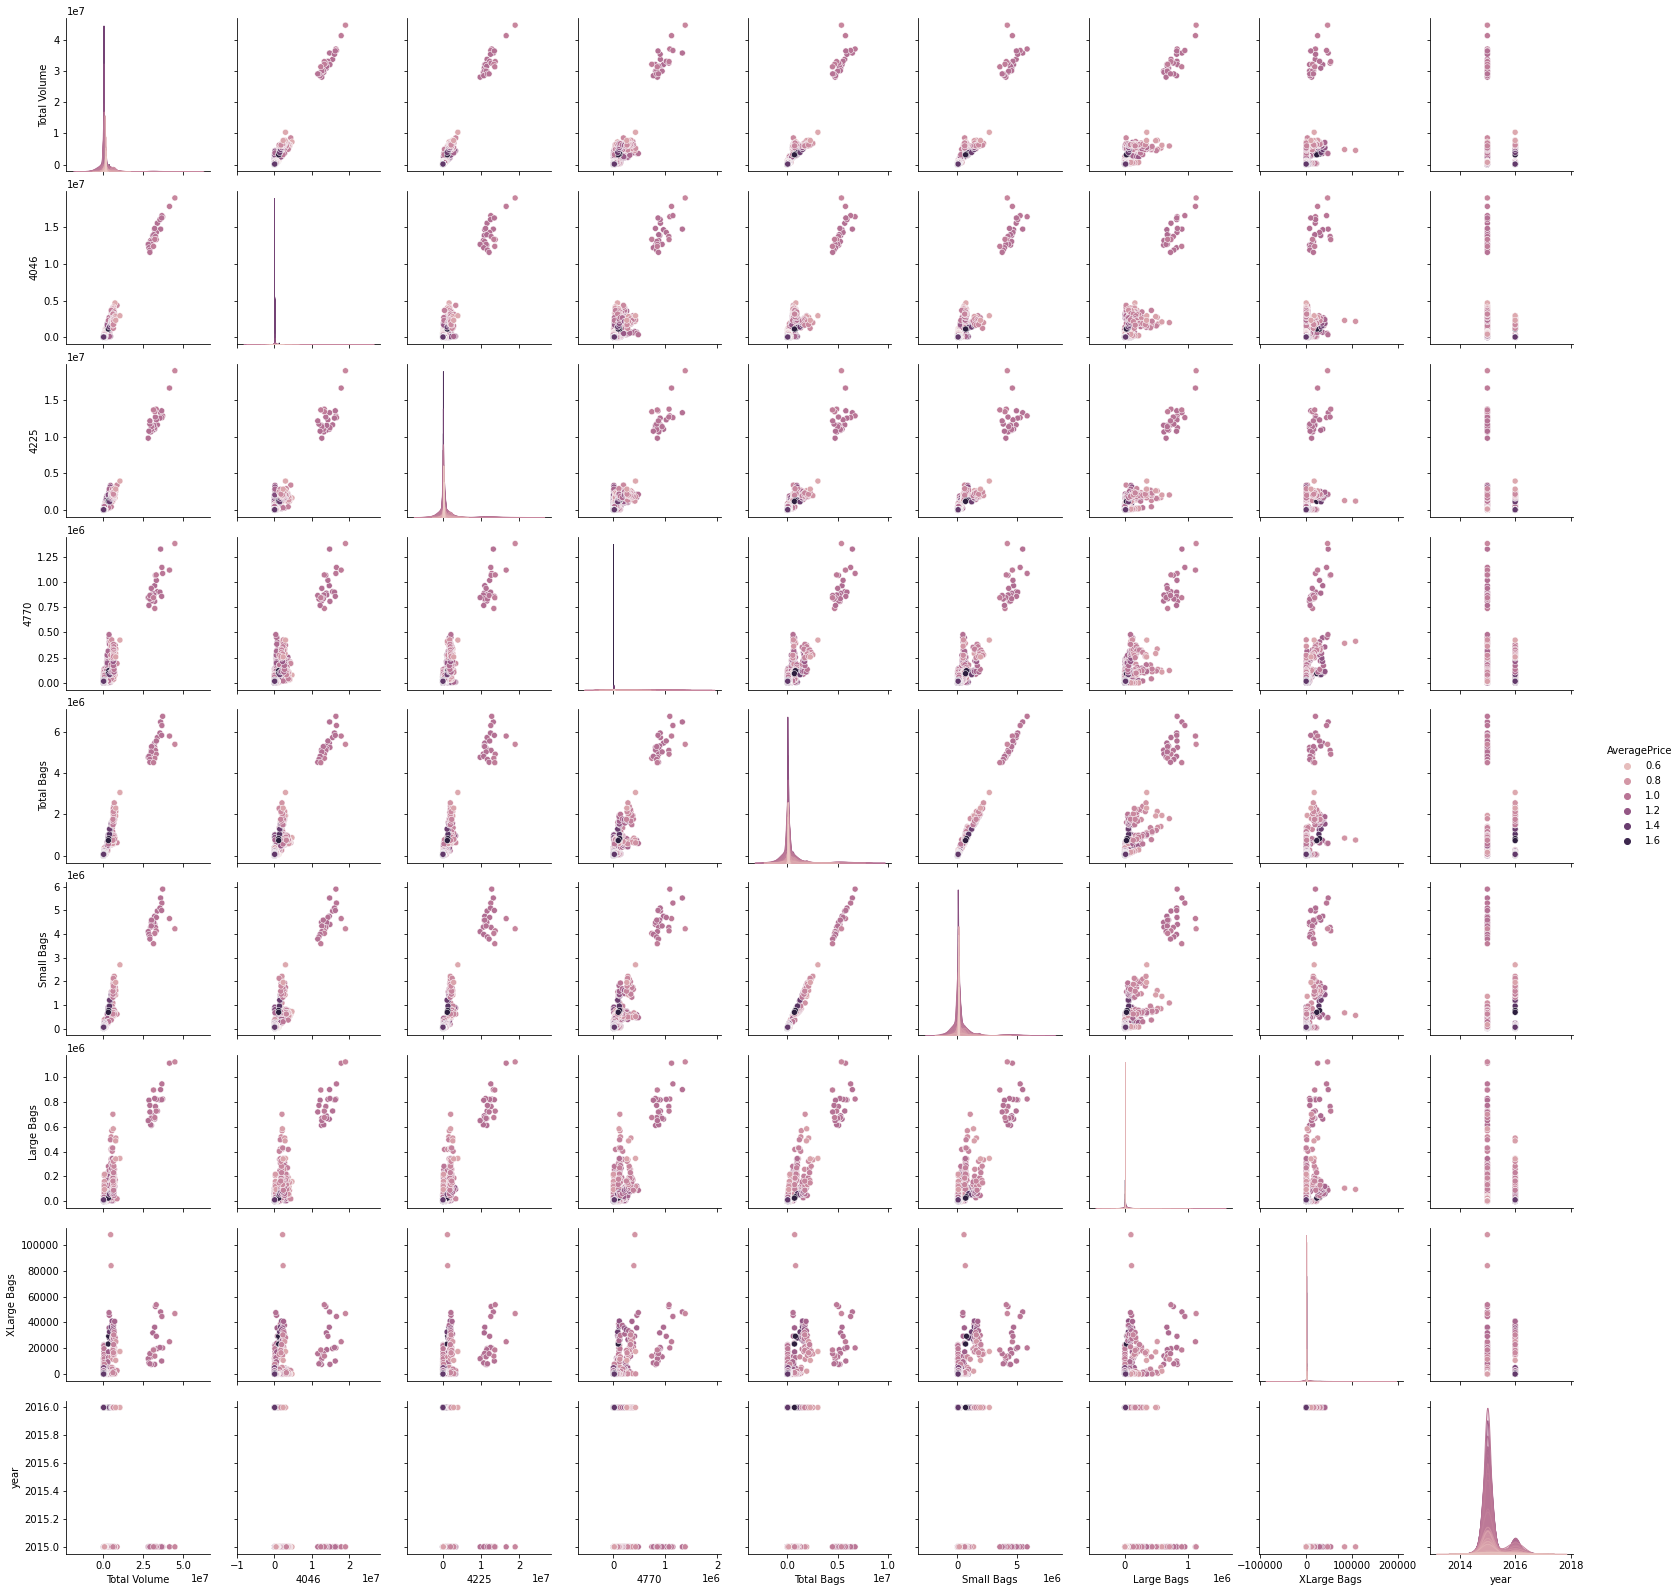

In [240]:
sns.pairplot(data = df, hue='AveragePrice')

# columns distribution

*******Distribution plot AveragePrice *************


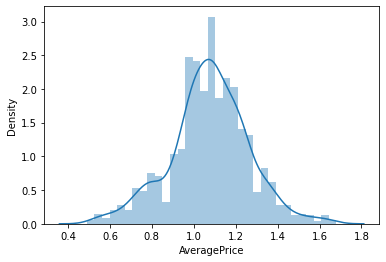

*********violin plots AveragePrice  *************


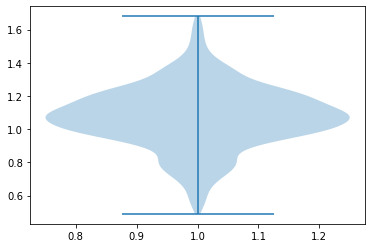




*******Distribution plot Total Volume *************


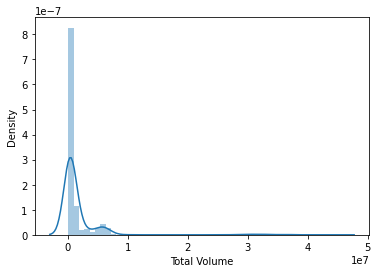

*********violin plots Total Volume  *************


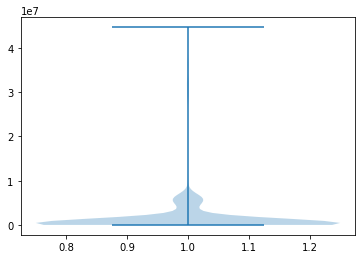




*******Distribution plot 4046 *************


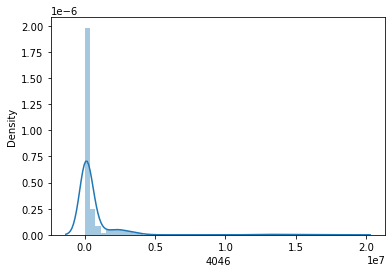

*********violin plots 4046  *************


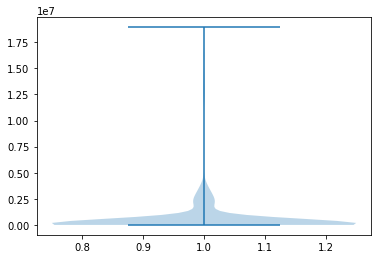




*******Distribution plot 4225 *************


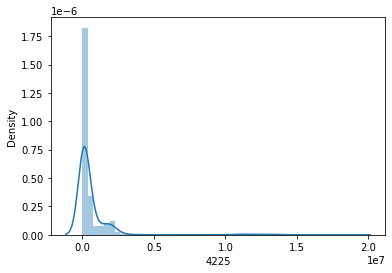

*********violin plots 4225  *************


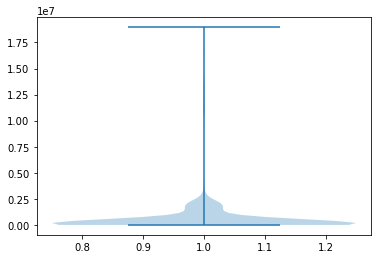




*******Distribution plot 4770 *************


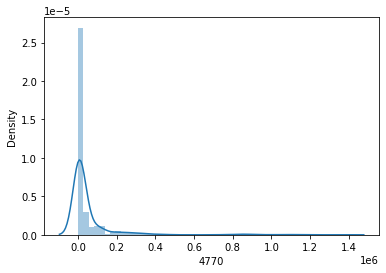

*********violin plots 4770  *************


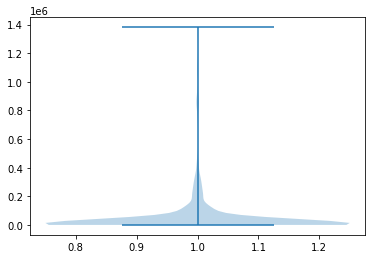




*******Distribution plot Total Bags *************


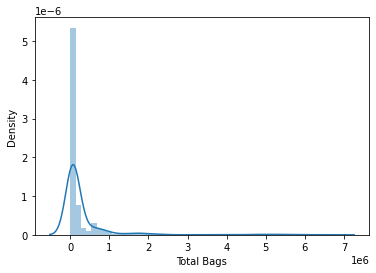

*********violin plots Total Bags  *************


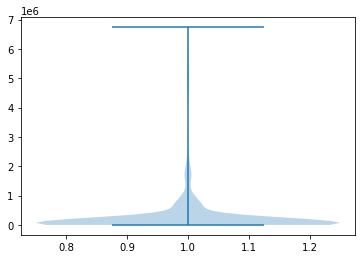




*******Distribution plot Small Bags *************


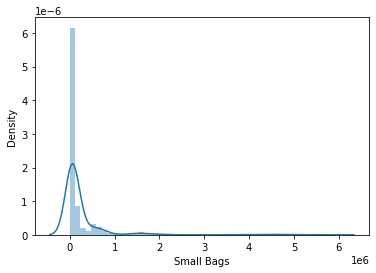

*********violin plots Small Bags  *************


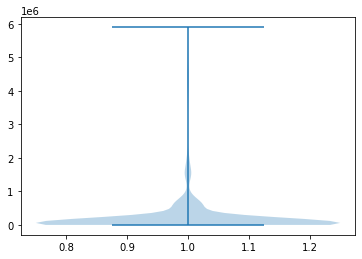




*******Distribution plot Large Bags *************


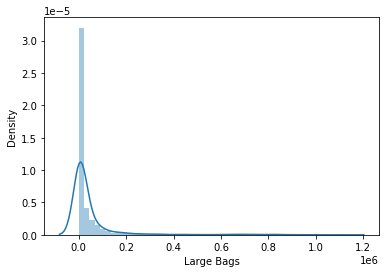

*********violin plots Large Bags  *************


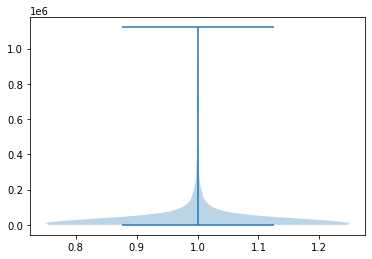




*******Distribution plot XLarge Bags *************


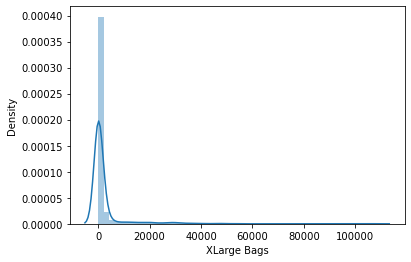

*********violin plots XLarge Bags  *************


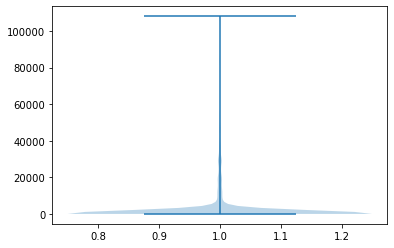




*******Distribution plot year *************


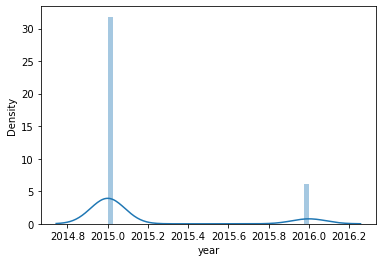

*********violin plots year  *************


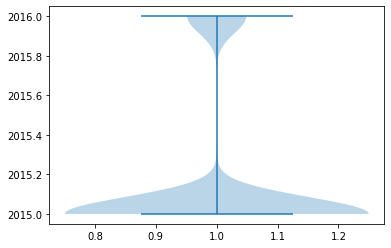

In [241]:
# distribution map
for i in contcols:
    print ('*******Distribution plot', i, '*************')
    sns.distplot(df[i])
    plt.show()
    print ('*********violin plots', i, ' *************')
    plt.violinplot(df[i])
    plt.show()
    print ('\n\n')
    


## Outliers Identification and Treatment

In [242]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [243]:
#Quantifying Outliers
for i in contcols:
    print('*****outliers are in ',i, 'column')
    outlier_iqr(df[i])

#IQR method suggesting there are no outliers in data 

*****outliers are in  AveragePrice column
outliers are [0.62, 0.49, 0.53, 0.66, 0.56, 0.62, 0.6, 0.65, 0.58, 0.66, 0.56, 0.54, 0.53, 0.52, 0.56, 0.58, 0.6, 0.53, 0.51, 0.66, 0.57, 0.57, 0.6, 0.63, 0.6, 0.64, 0.56, 0.61, 0.61, 0.65, 1.52, 1.53, 1.52, 1.56, 1.62, 1.63, 1.51, 1.62, 0.65, 0.58, 0.61, 0.63, 0.65, 1.56, 1.62, 1.61, 1.52, 1.56, 1.66, 1.57, 1.63, 1.6, 1.68, 1.68, 1.54, 1.57, 1.64, 1.57, 1.58, 1.52, 1.51]
lower_whisker value : 0.665 upper_whisker value 1.505
*****outliers are in  Total Volume column
outliers are [5806392.78, 5647385.15, 5193221.0, 5616434.08, 6232081.27, 5428238.87, 5557616.27, 5225200.52, 5451636.92, 6718011.83, 5641742.02, 5952597.29, 6741662.31, 6374842.9, 6236903.31, 5621713.64, 5289138.5, 6650357.96, 8567534.49, 4923565.04, 5871080.81, 5636644.51, 5467155.55, 5341821.67, 3602112.79, 3151714.0, 3574050.61, 3753201.03, 3501344.46, 3901054.42, 3234024.32, 3857605.11, 2895992.9, 2938918.81, 2971443.88, 3746598.18, 2948199.23, 3134752.64, 3566752.43, 2730224.03

In [244]:
#There are several outliers in the data, we must go for the imputation, 
#based on the skewness and kurtosis of data, imputation done with mean, median or mode respective of the column 

# Outlier Imputation

In [245]:
df['Total Volume']=df['Total Volume'].mask(df['Total Volume']>2233732,df['Total Volume'].mean()) 
df['4046']=df['4046'].mask(df['4046']>913345,df['4046'].mean())
df['4225']=df['4225'].mask(df['4225']>1150661,df['4225'].mean())
df['4770']=df['4770'].mask(df['4770']>71551,df['4225'].mean())
df['Total Bags']=df['Total Bags'].mask(df['Total Bags']>339713,df['Total Bags'].mean())
df['Small Bags']=df['Small Bags'].mask(df['Small Bags']>320907,df['Small Bags'].mean())
df['Large Bags']=df['Large Bags'].mask(df['Large Bags']>72358,df['Large Bags'].mean())

In [246]:
df.region.value_counts()
#So, in categorical column there are many of the unique values, theses will not get much shows the inference. ASo, droing the column


California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [247]:
df2=df.copy()

In [248]:
df.drop('region', axis=1, inplace=True)

In [249]:
#One Hot Encode
X=pd.get_dummies(df)
X.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,1
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,1
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,1


# Feature Engineering

In [250]:
corr = X.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional
AveragePrice,1.000000,-0.326065,-0.564768,-0.067660,-0.108751,-0.139987,-0.089278,-0.236693,-0.048284,0.178683,NaN
Total Volume,-0.326065,1.000000,0.788508,0.860509,0.633318,0.913340,0.889733,0.712801,0.382837,-0.003477,NaN
4046,-0.564768,0.788508,1.000000,0.439405,0.511363,0.613974,0.566012,0.591218,0.359250,-0.077038,NaN
4225,-0.067660,0.860509,0.439405,1.000000,0.569392,0.850370,0.851459,0.573638,0.305322,0.065613,NaN
4770,-0.108751,0.633318,0.511363,0.569392,1.000000,0.640075,0.632195,0.418083,0.573063,0.081036,NaN
Total Bags,-0.139987,0.913340,0.613974,0.850370,0.640075,1.000000,0.981702,0.708882,0.408595,0.103652,NaN
Small Bags,-0.089278,0.889733,0.566012,0.851459,0.632195,0.981702,1.000000,0.595724,0.394322,0.120006,NaN
Large Bags,-0.236693,0.712801,0.591218,0.573638,0.418083,0.708882,0.595724,1.000000,0.321207,-0.045121,NaN
XLarge Bags,-0.048284,0.382837,0.359250,0.305322,0.573063,0.408595,0.394322,0.321207,1.000000,0.218342,NaN
year,0.178683,-0.003477,-0.077038,0.065613,0.081036,0.103652,0.120006,-0.045121,0.218342,1.000000,NaN


<AxesSubplot:>

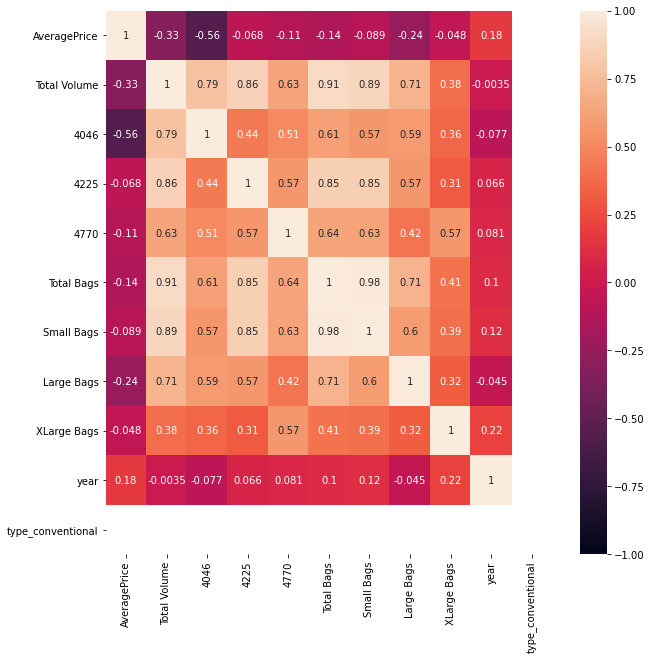

In [251]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

In [252]:
X.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_conventional'],
      dtype='object')

# Data Preparation

### Converting data in to array format

In [253]:
x=X[['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
x=np.array(x)
y=df['AveragePrice']
y = np.array(y)
x

array([[6.4236620e+04, 1.0367400e+03, 5.4454850e+04, ..., 9.3250000e+01,
        0.0000000e+00, 2.0150000e+03],
       [5.4876980e+04, 6.7428000e+02, 4.4638810e+04, ..., 9.7490000e+01,
        0.0000000e+00, 2.0150000e+03],
       [1.1822022e+05, 7.9470000e+02, 1.0914967e+05, ..., 1.0314000e+02,
        0.0000000e+00, 2.0150000e+03],
       ...,
       [1.7841082e+05, 4.6364750e+04, 5.2893380e+04, ..., 8.2581600e+03,
        8.2500000e+02, 2.0160000e+03],
       [1.8913152e+05, 5.4110790e+04, 5.3593580e+04, ..., 8.2782600e+03,
        0.0000000e+00, 2.0160000e+03],
       [1.8297830e+05, 4.3116410e+04, 5.4193420e+04, ..., 1.1648350e+04,
        0.0000000e+00, 2.0160000e+03]])

In [254]:
print (x)
print ('********************')
print (y)

[[6.4236620e+04 1.0367400e+03 5.4454850e+04 ... 9.3250000e+01
  0.0000000e+00 2.0150000e+03]
 [5.4876980e+04 6.7428000e+02 4.4638810e+04 ... 9.7490000e+01
  0.0000000e+00 2.0150000e+03]
 [1.1822022e+05 7.9470000e+02 1.0914967e+05 ... 1.0314000e+02
  0.0000000e+00 2.0150000e+03]
 ...
 [1.7841082e+05 4.6364750e+04 5.2893380e+04 ... 8.2581600e+03
  8.2500000e+02 2.0160000e+03]
 [1.8913152e+05 5.4110790e+04 5.3593580e+04 ... 8.2782600e+03
  0.0000000e+00 2.0160000e+03]
 [1.8297830e+05 4.3116410e+04 5.4193420e+04 ... 1.1648350e+04
  0.0000000e+00 2.0160000e+03]]
********************
[1.33 1.35 0.93 ... 1.48 1.47 1.43]


In [255]:
#Data splitting for model evealution 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)




# Regression Models

## Multi Linear Regression (MLR)

In [256]:
from sklearn.linear_model import LinearRegression
mlr_model=LinearRegression(fit_intercept=True)
mlr_model.fit(x_train, y_train)
mlr_pred = mlr_model.predict(x_test)
print ('Model predicted values', mlr_pred)


Model predicted values [1.1570389  0.97084359 0.74194186 1.11912778 1.11699186 1.13171087
 1.14823987 1.18797085 1.1653039  1.13267669 1.19486881 1.08746845
 1.16190558 1.04281801 0.82715837 1.15113102 0.9798731  1.27714155
 1.02064142 1.0382151  0.80225684 1.1052024  1.19326072 0.97205344
 1.05209912 1.06337819 1.15456418 1.14844731 1.04102688 0.97064758
 1.16081898 1.06478931 1.06513534 1.01908963 1.14546691 1.22409462
 1.13481766 1.1373765  1.07678406 0.85150167 0.92079971 0.99930578
 0.94832262 1.17871731 1.06561857 1.12485736 1.08846504 1.18429344
 1.0916773  0.72222392 0.83501699 1.16332743 1.05255277 1.13720229
 1.00498942 1.14773695 1.11201637 0.99167544 0.90207097 0.78069916
 0.98479755 1.21351081 1.10125304 1.04213655 0.98324701 1.1249776
 1.09897709 1.07321147 1.12236573 1.16420544 0.97081875 1.0854477
 1.07325993 1.01766355 1.1310064  1.0932739  0.8957618  1.12837515
 1.01733359 1.16146608 1.11570412 1.11489369 1.01708741 1.07848803
 1.15198996 1.17094305 1.10004124 1.12910

In [257]:
mlr_model.coef_ #(slope values each individual channels)

array([-1.87418569e-07, -3.96674075e-07,  9.21895602e-08,  2.31697292e-07,
       -1.67480140e-06,  2.71146672e-06,  2.41400126e-06,  8.99163297e-07,
        3.10895754e-02])

In [258]:
print ('intercept value:',mlr_model.intercept_)

intercept value: -61.51837331090125


In [259]:
print ('R2 value of model', round(r2_score(mlr_pred, y_test)*100, 2), '%')

R2 value of model -42.63 %


In [260]:
df1.dtypes

actual value       float64
predicted value    float64
Error value        float64
dtype: object

In [261]:
import math
df1=pd.DataFrame({'actual value':y_test, 'predicted value': mlr_pred})
df1['Error value'] = (df1['actual value']-df1['predicted value'])**2
df1.head(15) 

,actual value,predicted value,Error value
0,0.99,1.157039,0.027902
1,0.92,0.970844,0.002585
2,0.60,0.741942,0.020147
3,1.03,1.119128,0.007944
4,1.06,1.116992,0.003248
5,1.17,1.131711,0.001466
6,0.94,1.148240,0.043364
7,1.10,1.187971,0.007739
8,1.03,1.165304,0.018307
9,1.17,1.132677,0.001393


## Decision Tree Regression

In [262]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor(criterion='mse', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = DT_model.predict(x_test)
print (DT_pred)


[1.15 0.93 0.63 0.94 1.04 1.1  0.93 1.2  0.99 1.09 1.24 1.07 1.13 1.13
 1.05 1.21 1.15 1.37 0.84 1.06 1.01 1.04 1.07 1.12 0.98 1.05 1.17 1.24
 1.02 0.93 0.94 1.08 1.39 0.96 0.91 1.19 1.32 0.91 1.08 1.   1.12 0.98
 1.01 1.37 1.23 1.12 1.11 1.38 0.95 0.65 0.78 1.02 1.   1.07 1.04 1.24
 1.34 1.07 0.77 0.79 1.02 1.14 1.21 1.05 0.95 1.21 0.94 1.2  0.91 1.24
 0.93 1.2  1.07 0.99 1.28 1.06 0.78 1.21 1.02 1.2  1.01 0.99 0.93 0.91
 1.24 1.17 0.99 1.45 0.96 1.23 0.99 1.09 1.23 1.07 1.1  1.01 1.24 1.46
 0.93 1.25 1.36 1.1  1.03 1.01 1.33 1.24 1.   1.09 1.15 1.45 1.23 1.06
 1.54 0.96 1.63 0.96 0.83 0.71 0.94 0.96 1.03 1.23 1.01 1.15 1.07 1.19
 1.03 1.09 0.83 1.06 0.93 1.09 1.1  1.36 1.11 0.65 1.07 1.16 1.24 1.24
 1.03 1.05 1.08 0.75 1.14 0.79 1.15 0.93 0.73 1.   0.88 1.17 1.19 1.2
 1.34 1.06 1.14 1.1  0.97 1.4  1.23 1.36 0.93 1.03 0.96 0.99 1.4  1.09
 1.23 0.97 1.24 0.99 0.56 1.28 1.37 0.97 0.95 1.23 0.7  1.21 0.99 1.09
 1.21 0.86 1.28 1.17 0.56 1.01 1.17 0.57 0.98 1.43 1.31 1.1  1.   0.99
 1.02 0

In [263]:
print ('R2 value of model', round(r2_score(DT_pred, y_test)*100, 2), '%')

R2 value of model 64.35 %


# Ensemble methods


### Bagging - Random Forest

In [264]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [265]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeRegressor(criterion='mse'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

62.89078167803961


In [266]:
list1=list(range(10, 300, 20))
list1

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]

In [267]:
for w in range(10,300,20):
    rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeRegressor(criterion='mse'))
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

For n_estimators = 10
OOB score is =30.527909455521286
************************
For n_estimators = 30
OOB score is =70.60578514655866
************************
For n_estimators = 50
OOB score is =72.38162745966142
************************
For n_estimators = 70
OOB score is =73.30756852506562
************************
For n_estimators = 90
OOB score is =73.64212257203296
************************
For n_estimators = 110
OOB score is =73.64497887491426
************************
For n_estimators = 130
OOB score is =74.24727398320576
************************
For n_estimators = 150
OOB score is =74.52350499908157
************************
For n_estimators = 170
OOB score is =74.58247557086206
************************
For n_estimators = 190
OOB score is =74.8524463560373
************************
For n_estimators = 210
OOB score is =74.81420813797088
************************
For n_estimators = 230
OOB score is =74.88254525313396
************************
For n_estimators = 250
OOB score is =74.93544

In [268]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=170,random_state=400,
                      base_estimator=DecisionTreeRegressor())
rf_model.fit(x_train,y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=170,
                 n_jobs=-1, oob_score=True, random_state=400)

In [269]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


[array([0.07629351, 0.40476928, 0.03479211, 0.11177918, 0.06806825,
       0.04585103, 0.08407754, 0.14191781, 0.03245128]), array([0.09330558, 0.39763406, 0.09651397, 0.10162796, 0.0667567 ,
       0.04489198, 0.05071723, 0.13241723, 0.0161353 ]), array([0.08858357, 0.320095  , 0.12717646, 0.1211092 , 0.0386878 ,
       0.12617998, 0.05356486, 0.08091499, 0.04368815]), array([0.1107976 , 0.35462641, 0.09379977, 0.09898556, 0.06153539,
       0.05062389, 0.04843167, 0.1624796 , 0.01872011]), array([0.04851877, 0.39311291, 0.06490377, 0.11372072, 0.03459642,
       0.07727817, 0.04634816, 0.19034551, 0.03117557]), array([0.13733317, 0.35297289, 0.06028506, 0.15359238, 0.02176345,
       0.05163425, 0.06461998, 0.11036034, 0.04743847]), array([0.1341959 , 0.38839344, 0.04477687, 0.10848284, 0.06461931,
       0.03433016, 0.07317456, 0.1369589 , 0.015068  ]), array([0.0708174 , 0.36121396, 0.04778454, 0.15279982, 0.02685001,
       0.09728209, 0.12874401, 0.10157844, 0.01292973]), array([

In [270]:
imp=np.mean(imp,axis=0)
imp

array([0.08804784, 0.38629938, 0.08054279, 0.10449057, 0.05157092,
       0.07952327, 0.06678666, 0.10867843, 0.03406015])

In [271]:
#prediction
rf_pred = rf_model.predict(x_test)
print (rf_pred)

[1.08394118 0.93347059 0.61764706 1.05452941 1.05517647 1.07329412
 1.05782353 1.22929412 1.02188235 1.08452941 1.17035294 1.04782353
 1.47141176 1.07594118 0.97347059 1.17188235 1.04123529 1.28717647
 0.88041176 1.01288235 1.01752941 1.02970588 1.14623529 1.11552941
 0.99135294 1.09429412 1.13729412 1.17347059 1.07252941 0.94523529
 0.93411765 1.07211765 1.18782353 0.94341176 1.07135294 1.15858824
 1.19235294 1.08041176 1.12252941 0.99111765 1.06558824 1.01447059
 1.00894118 0.88841176 1.21852941 1.14841176 1.06382353 1.36041176
 1.00076471 0.65758824 0.75123529 1.17694118 1.03576471 1.07941176
 1.07429412 1.17147059 1.27070588 1.06023529 0.75658824 0.77347059
 1.00129412 1.09270588 1.18623529 1.10111765 0.961      1.26947059
 1.02617647 1.00341176 1.08517647 1.19864706 0.93535294 1.08588235
 1.10611765 1.08094118 1.12658824 1.05411765 0.77735294 1.20117647
 1.01752941 1.14147059 1.02552941 1.06964706 0.87458824 1.05276471
 1.19711765 1.13764706 1.01011765 1.23764706 1.09735294 1.0820

In [272]:
#Visualizing the Decision Tree
!pip install pydotplus

In [273]:
!pip install graphviz
import graphviz
import pydotplus
import sklearn.tree as tree

In [274]:
dot_data =tree.export_graphviz(DT_model, out_file=None,  # export_graphviz is component of tree model
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)
print (dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>1</SUB> &le; 343949.625<br/>mse = 0.036<br/>samples = 1213<br/>value = 1.075>, fillcolor="#f3c3a0"] ;
1 [label=<X<SUB>1</SUB> &le; 31925.935<br/>mse = 0.024<br/>samples = 893<br/>value = 1.133>, fillcolor="#f1bc96"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 72.015<br/>mse = 0.024<br/>samples = 363<br/>value = 1.195>, fillcolor="#f0b68c"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 133450.77<br/>mse = 0.02<br/>samples = 55<br/>value = 1.335>, fillcolor="#eda674"] ;
2 -> 3 ;
4 [label=<X<SUB>8</SUB> &le; 2015.5<br/>mse = 0.015<br/>samples = 43<br/>value = 1.378>, fillcolor="#eca26d"] ;
3 -> 4 ;
5 [label=<X<SUB>6</SUB> &le; 422.22<br/>mse = 0.005<br/>samples = 25<br/>value = 1.315>, fillcolor="#eda977"] ;
4 -> 5 ;
6 [label=<X<SUB>1</SUB> &le; 1002.565<br/>mse = 0.002<br/>samples = 19<br/>value = 1.345>, fill

# Classification Problem

In [275]:
# data stored for dataframe in df1


# Encoding the region column

In [276]:
df2.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [278]:
df2.drop('type', axis=1, inplace=True)

In [279]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['region']=le.fit_transform(df2['region'])

In [280]:
X=df2[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']]

In [281]:
Y=df2['region']

In [282]:
#Data Splitting
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200) 
x_train

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
778,0.78,8.738565e+05,562928.770000,228549.090000,4923.05,77455.610000,75885.270000,1570.340000,0.00,2015.0
1331,1.37,5.958714e+04,24935.250000,2893.680000,7688.17,24070.040000,23558.620000,408.160000,103.26,2016.0
1020,0.82,1.601879e+06,646438.654113,611437.502591,27985.18,293597.415735,248773.595287,42642.049374,31.67,2015.0
853,1.04,4.065482e+05,100419.740000,152265.410000,15085.38,138777.630000,136935.610000,236.070000,1605.95,2015.0
536,1.05,2.930363e+05,92829.750000,151163.750000,12440.57,36602.270000,35745.050000,857.220000,0.00,2015.0
...,...,...,...,...,...,...,...,...,...,...
1103,1.12,7.499931e+04,36451.470000,26800.470000,2051.36,9696.010000,9376.010000,320.000000,0.00,2015.0
844,1.09,1.402842e+06,737363.860000,448207.790000,10009.45,207260.730000,205299.640000,954.590000,1006.50,2015.0
810,0.61,1.110753e+06,849580.750000,182629.590000,12237.43,66305.280000,66305.280000,0.000000,0.00,2015.0
784,0.70,1.015567e+06,689407.920000,201234.960000,4759.57,120165.040000,84710.720000,35134.880000,319.44,2015.0


In [283]:
#Data Scalling

In [284]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler(with_mean=True, with_std=True)
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_train.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.573389,0.461345,1.361909,-0.085841,-0.496473,-0.352740,-0.226683,-0.735791,-0.287645,-0.441672
1,1.611708,-1.005194,-0.753460,-0.977691,-0.465399,-0.900419,-0.841018,-0.799275,-0.274120,2.264125
2,-1.357451,1.772549,1.690267,1.427436,-0.237306,1.864644,1.803092,1.507746,-0.283497,-0.441672
3,-0.169787,-0.380300,-0.456658,-0.387334,-0.382271,0.276358,0.490072,-0.808675,-0.077301,-0.441672
4,-0.115802,-0.584740,-0.486502,-0.391688,-0.411993,-0.771852,-0.697944,-0.774745,-0.287645,-0.441672


In [285]:
#Support vector Machine
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf', gamma='auto', probability=False)
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
df1_svc = pd.DataFrame({'real_value':y_test, 'svc_predict':svc_pred})
print (svc_pred)
df1_svc

[44  5 48 44 13  5  6 22 13 31 12 19 10 34 26  5 49  4 12 19 41 31 42 13
 49 41  9 28  6  9 49 22  0  4 26  4 11 34 47 49 22  2  4 48 41 49 44 13
 42  9 45  9  4 42 17 31  1  9  5  3 33 42 31  0  9 39 26 10 28 17 22 26
  9  4 22 44 12  1  5 38 22 11 47 14 49 26 13  5  6 44 49 14 49  0 19  2
 44  5 48 47 19 11 34 38 47  0  2  1  0  5  3 28  2 31 13 34  4 13  0 12
  3 13  2 22 33 13 50  9 44  5 31  0 11 13  4 38 39 31  2 26 12  4  3  9
 43  9 23 31 48 34  5 42  9 26 31 48 49 23 44 48  0  3 48 24  2  9 31  2
 26 44 41  9 45 11  2  5  9  1 44 44 49  1  0 44 22  1 28 22 10 13  4 49
  5 12  9  9 19  6  4  6  9  9 49  9 38 22 38  0 44 24 26 23 38 13 19 50
 26 49 44 19 48 13 17 31 13  1  0  2 26 44  5  0 10  9 49  3  1  9  9  2
  9 13  2 47  0  8  6  8  9 26 41 47 44 47 31 23  9 38  9 28 44  0 39 12
 31  4 12  9 22  4 50 13 26 13 44 12 10  5  2  6  4  9 19 12  7 46  6  1
 12 33  0  6  3  0 19  6 49 13 44 28 13 48  8  9]


,real_value,svc_predict
1064,44,44
1418,5,5
401,14,48
1083,44,44
379,13,13
...,...,...
713,28,28
419,15,13
412,14,48
234,8,8


In [291]:
print ('confusion matrix', confusion_matrix(y_test, svc_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, svc_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, svc_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, svc_pred, average='micro')*100, 2), '%')

confusion matrix [[ 9  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  1  7  0]
 [ 0  0  0 ...  0  0  3]]
*****************************
accuracy score 66.12 %
*****************************
precision score 66.12 %
*****************************
recall score 66.12 %
*****************************
f1- score 66.12 %


In [293]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='gini', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = DT_model.predict(x_test)
df1_DT = pd.DataFrame({'real_value':y_test, 'DT_predict':DT_pred})
print (DT_pred)
df1_DT

[44  5 33 44  5  5 33 32  7 31 12 32 10 34 26  5 33  4 12 19 41 31 33 35
 33 41 20  0 33  9 33 32 46 30 26  8 11 34  1 33 22  2  4 33 41 33  3  0
 50 20 45  9  2 33 10 50 47  9  5 44 33 33 31 44  3  2 26 17 16 17 22 40
 20  4  9 37 36  1  7 38 22 11 47 33 33 26 37  7 33  0 33 33 33 32 19  2
 44  5 33 47 29 11 39 31 47  0  2  1  0  5  9 30  2 31  5 39  4 35  0 12
  9 37  2 22 33 15 50  9  3  5 39  0 11 35  4 38 39 31  2 26 12 30  3  9
 33 36 23 31 33 12  7 33  9 26 50 33 33 23 44 33  0 31 33 33  2  9 10  2
 26 44 12 20 45 11  2  7 36  1  3  0 33  1 44 37 22  1 16 18 10 37 30 33
  5 12 20  9 19 33 30 33 13  9 33 32 38 19 38  0 44  6 40 23 38 13 47 10
 26 33 44 32 33 35 31 31 35 23  0  2 26  0  5  0 10 20 33  3 47  9  9  4
 20 35  2 47 46  8 50  8  3 26 41 47 44 47 31 23 20 38 36 16  0  0 31 12
 50 16 12  9 32  4 50  7 26 37 44 12 17  5  2 33 30 36 47 12 35 46 33  1
 12 33  0 33  3  0 19 33 24  5 22 16 37 33  8  9]


,real_value,DT_predict
1064,44,44
1418,5,5
401,14,33
1083,44,44
379,13,5
...,...,...
713,28,16
419,15,37
412,14,33
234,8,8


In [295]:
print ('confusion matrix', confusion_matrix(y_test, DT_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, DT_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, DT_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, DT_pred, average='micro')*100, 2), '%')

confusion matrix [[11  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  5]]
*****************************
accuracy score 62.5 %
*****************************
precision score 62.5 %
*****************************
recall score 62.5 %
*****************************
f1- score 62.5 %


### Bagging - Random Forest


In [296]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier(criterion='gini'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

91.75597691673538


In [297]:
list1=list(range(10, 300, 20))
list1

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]

In [298]:
for w in range(10,300,20):
    rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

For n_estimators = 10
OOB score is =87.46908491343775
************************
For n_estimators = 30
OOB score is =93.239901071723
************************
For n_estimators = 50
OOB score is =93.65210222588624
************************
For n_estimators = 70
OOB score is =94.22918384171476
************************
For n_estimators = 90
OOB score is =94.06430338004947
************************
For n_estimators = 110
OOB score is =94.4765045342127
************************
For n_estimators = 130
OOB score is =94.64138499587798
************************
For n_estimators = 150
OOB score is =94.97114591920858
************************
For n_estimators = 170
OOB score is =94.55894476504534
************************
For n_estimators = 190
OOB score is =94.80626545754328
************************
For n_estimators = 210
OOB score is =94.55894476504534
************************
For n_estimators = 230
OOB score is =94.55894476504534
************************
For n_estimators = 250
OOB score is =94.72382522

In [299]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=170,random_state=400,
                      base_estimator=DecisionTreeClassifier())
rf_model.fit(x_train,y_train) # fitting bagged tree classifier  model 

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=170,
                  n_jobs=-1, oob_score=True, random_state=400)

In [300]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


[array([0.04505984, 0.09923734, 0.18053662, 0.14397243, 0.11621747,
       0.08122201, 0.10732712, 0.12440732, 0.0903878 , 0.01163205]), array([0.05031364, 0.0626897 , 0.1913867 , 0.17149251, 0.09719808,
       0.13341377, 0.0656761 , 0.13003759, 0.06884819, 0.02894371]), array([0.05304649, 0.13067917, 0.18311125, 0.12169015, 0.16768927,
       0.11006241, 0.01803202, 0.0907341 , 0.07491049, 0.05004465]), array([0.07070545, 0.09826989, 0.16252418, 0.17420639, 0.1292254 ,
       0.07993952, 0.08092649, 0.09219374, 0.07731433, 0.03469462]), array([0.07925576, 0.07501375, 0.21105242, 0.12008862, 0.16900591,
       0.09045505, 0.02534189, 0.11727372, 0.06673754, 0.04577535]), array([0.0813951 , 0.16670293, 0.15001029, 0.14254972, 0.11293745,
       0.06943197, 0.06777119, 0.08341719, 0.07699347, 0.04879068]), array([0.05209469, 0.07886983, 0.23646564, 0.12539711, 0.11325066,
       0.08468398, 0.06389607, 0.14042387, 0.08013801, 0.02478013]), array([0.07289357, 0.10746423, 0.19520548, 0.14

In [301]:
imp=np.mean(imp,axis=0)
imp

array([0.06205513, 0.08915438, 0.19325461, 0.14100025, 0.14761284,
       0.07750757, 0.07371226, 0.09417499, 0.08566711, 0.03586086])

In [302]:
#converting summarised feature importance measures into series object.
feature_importance=pd.Series(imp,index=X.columns.tolist())
feature_importance

AveragePrice    0.062055
Total Volume    0.089154
4046            0.193255
4225            0.141000
4770            0.147613
Total Bags      0.077508
Small Bags      0.073712
Large Bags      0.094175
XLarge Bags     0.085667
year            0.035861
dtype: float64

In [303]:
#prediction
rf_pred = rf_model.predict(x_test)
df1_rf = pd.DataFrame({'real_value':y_test, 'rf_predict':rf_pred})
print (rf_pred)
df1_rf

[44  5 14 44 13  5  6 32  7 31 12 32 10 34 26  5 49  4 12 19 41 31 42 35
 33 41 25 16  6  9 49 32 46 30 26  4 11 34  1 49 22  2  4 48 41 49  3 16
 42 20 45  9  2 21 10 50 23  9  5  3 33 42 31 44  9 39 26 17  4 17 22 27
 25  4 18 37 35  1  7 38 22 11 29 24 49 26 15  7  6  0 49 48 42 46 19  2
 44  5 14 23 19 11 34 38 47  0  2  1  0  5  3 30  2 31 13 34  4 35  0 12
  7 15  2 22 33 15 50  9  3  5 38 16 11 35  4 38 39 31  2 26 12 30  3  9
 43 36 23 31 49 34  7 42  9 26 31 48 42 23 44 48  0 31 48 24  2  9 31  2
 26 44 12 25 45 11  2  7 36  1  3  0 33  1  0 37 22  1 15 18 10 15 30 24
  5 12 25  9 19 24 30  6 13  9 24 32 38 22 38  0 44 24 27 23 38 13 29 50
 26 42 44 32 48 35 17 31 35 23  0  2 26  0  5 46 10 25 42  3  1  9  9  4
 25 35  2 47 16  8  6  8 44 26 41 47 44 29 31 23 25 38 36  4  0 46 39 12
 50  4 12  9 32  4 50 15 26 15 44 12 17  5  2  6 30 36 29 12 35  5  6  1
 12 33  0  6  3  0 19  6 24 16 22  4 15 14  8  9]


,real_value,rf_predict
1064,44,44
1418,5,5
401,14,14
1083,44,44
379,13,13
...,...,...
713,28,4
419,15,15
412,14,14
234,8,8


In [304]:
print ('confusion matrix', confusion_matrix(y_test, rf_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, rf_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, rf_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, rf_pred, average='micro')*100, 2), '%')

confusion matrix [[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  5]]
*****************************
accuracy score 88.49 %
*****************************
precision score 88.49 %
*****************************
recall score 88.49 %
*****************************
f1- score 88.49 %
